
# Tutorial: Latrocínio e morte por causas evitáveis


## 1) Instalar SPCrime

In [1]:
!pip install git+https://github.com/marialgk/SPCrime.git

  Cloning https://github.com/marialgk/SPCrime.git to /tmp/pip-req-build-ddqxrmqc
  Running command git clone --filter=blob:none --quiet https://github.com/marialgk/SPCrime.git /tmp/pip-req-build-ddqxrmqc
  Resolved https://github.com/marialgk/SPCrime.git to commit 7bee199f6ed19eecfecaa45043a903aeb4bf0635
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.6 MB/s eta 0:00:00
  Created wheel for SPCrime: filename=SPCrime-0.1.1-py3-none-any.whl size=4041994 sha256=f7da7218f388b3b8de09c07dc1a9f514242f8bfb1dabac8a9a3f5d8bc53c920a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wyv2hsle/wheels/d8/b3/9c/e30d978effab69829b2b64ff9d2a78149748afbd26ed9df9d9
Successfully built SPCrime


## 2) Importar SPCrime e outras bibliotecas

In [2]:
from SPCrime import SPCrime

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3) Construir base de dados de taxa de latrocínios por 10,000 habitantes

Iremos construir uma base de dados com a frequência relativa de latrocínios nos municípios do estado de São Paulo. Utilizaremos a função SPCrime.single_crime_rates(), que toma como argumentos:


*   ```crime_type```**(str)**. Tipo de crime. Lista de opções em https://github.com/marialgk/SPCrime/blob/main/README.md
*   ```crime_db``` **(str)**. Caminho e nome do arquivo contendo dados criminais. Se esta for a primeira vez que você roda a função, use o arquivo XLSX obtido em https://www.ssp.sp.gov.br/estatistica/consultas. Se você tiver o arquivo intermediário produzido em corridas anteriores, use o arquivo TSV internediário.
*  ```n_capita``` **(int)** *(Opcional)*. Número de habitantes pelo qual o número de ocorrências será padronizado. O padrão é número de ocorrências por dez mil habitantes (ex. 10 furtos por 10,000 pessoas).
*   ```premade``` **(Bool)** *(Opcional)*. Caso você já tenha rodado esta função e salvo o arquivo TSV intermediário, use ```True```. Se decidir processar a base de dados da SSP-SP do zero, use ```False```.
*   ```save_excel``` **(Bool)** *(Opcional)*. Salvar o arquivo com a taxa de crimes com a extensão XLSX.


### Opção 1: Processar dados brutos da Secretaria de Segurança Pública do Estado de São Paulo (SSP-SP)

Nesta opção, processaremos do zero a base de dados da SSP-SP relativa a 2022.

O nome do arquivo é o segundo argumento posicional. Deixe o argumento opcional premade como ```False```.

Faça o download em www.ssp.sp.gov.br/estatistica/consultas. Não fornecemos este arquivo no repositório devido ao seu grande tamanho.


In [11]:
lat = SPCrime.single_crime_rates('LATROCÍNIO',
                                 '2022.xlsx',
                                 n_percapita=10000,
                                 premade=False,
                                 save_excel=True)

A saída de streaming foi truncada nas últimas 5000 linhas.
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not São Paulo
not

,LOCATION,HOMICÍDIO DOLOSO,HOMICÍDIO DOLOSO_rate
0,adamantina,4,1.153170
1,adolfo,2,4.596644
2,agudos,1,0.265393
3,altinopolis,2,1.189202
4,alvares machado,5,1.834526
...,...,...,...
259,valparaiso,1,0.412524
260,varzea paulista,4,0.345510
261,vinhedo,4,0.522603
262,votorantim,8,0.625376


### Opção 2: Segunda corrida

Se você já rodou a função com o mesmo ano base da SSP, você deve ter salvo um arquivo TSV intermediário. Você pode reutilizá-lo para diminuir drasticamente o tempo de execução.

Para isto, o segundo argumento posicional é o nome deste arquivo. O argumento opcional ```premade``` está ajustado para ```True```.

In [4]:
lat = SPCrime.single_crime_rates('LATROCÍNIO',
                                 '2022_crimes.tsv',
                                 n_percapita=10000,
                                 premade=True,
                                 save_excel=True)

close match: sao andre


### Opção 3: Mais de um tipo de crime

Nas opções anteriores, consideramos apenas um tipo de crime (homicídio doloso). Se você desejar processar mais de um tipo de crime, utilize a função ```multiple_crime_rates```. Ela tem argumentos semelhantes a ```single_crime_rates```, com exceção de ```crime_type``` que é uma lista de strings. No exemplo abaixo, calculamos as taxas de todos os tipos de homicídio.

In [5]:
homicidio = ['LESÃO CORPORAL SEGUIDA DE MORTE',
             'TENTATIVA DE HOMICIDIO',
             'HOMICÍDIO DOLOSO',
             'LATROCÍNIO',
             'HOMICIDIO CULPOSO POR ACIDENTE DE TRANSITO',
             'HOMICIDIO CULPOSO OUTROS',
             'HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO']

In [6]:
hom_all = SPCrime.multiple_crime_rates(homicidio,
                                       '2022_crimes.tsv',
                                       n_percapita=10000,
                                       premade=True,
                                       save_excel=True)

close match: biritiba-mirim
close match: espirito sao do turvo
close match: espirito sto. pinhal
close match: euclides da cunha pta
close match: florinia
close match: guarani d oeste
close match: palmeira d oeste
close match: pirapora bom jesus
close match: sao adelia
close match: sao andre
close match: sao antonio de aracangua
close match: sao antonio de posse
close match: sao antonio do pinhal
close match: sao barbara d oeste
close match: sao branca
close match: sao cruz da conceicao
close match: sao cruz das palmeiras
close match: sao cruz do rio pardo
close match: sao ernestina
close match: sao expedito
close match: sao fe do sul
close match: sao gertrudes
close match: sao isabel
close match: sao lucia
close match: sao mercedes
close match: sao rita passa quatro
close match: sao rosa de viterbo
close match: aparecida d oeste
close match: campina monte alegre
close match: euclides da cunha pta
close match: mirante paranapanema
close match: pirapora bom jesus
close match: sao anastac

In [7]:
hom_all

,LESÃO CORPORAL SEGUIDA DE MORTE,TENTATIVA DE HOMICIDIO,HOMICÍDIO DOLOSO,LATROCÍNIO,HOMICIDIO CULPOSO POR ACIDENTE DE TRANSITO,HOMICIDIO CULPOSO OUTROS,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO
LOCATION,,,,,,,
adamantina,NaN,0.576585,1.153170,NaN,0.864877,NaN,NaN
adolfo,NaN,NaN,4.596644,NaN,2.298322,NaN,NaN
agua rasa,NaN,0.121560,NaN,NaN,0.850919,NaN,NaN
aguai,NaN,0.623597,NaN,NaN,1.558992,NaN,NaN
aguas da prata,NaN,NaN,NaN,NaN,2.714072,NaN,NaN
...,...,...,...,...,...,...,...
viradouro,NaN,0.574251,NaN,NaN,1.722752,NaN,NaN
vista alegre do alto,NaN,NaN,NaN,NaN,2.466395,NaN,NaN
vitoria brasil,NaN,NaN,NaN,NaN,16.722408,NaN,NaN


## 4) Carregar dados de saúde

Obtivemos dados de número absoluto de óbitos por causas evitáveis na faixa etária de 5 a 74 anos, no ano de 2022, por município paulista.

O Sistema Único de Saúde (SUS) define **causas evitáveis** como:


> um agravo ou situação, prevenível pela atuação dos serviços de saúde que incidem, provavelmente, quando o sistema de saúde não consegue atender as necessidades de saúde e seus fatores determinantes são frágeis a identificação e a intervenção acertada.



A fonte é o DataSUS (https://datasus.saude.gov.br/mortalidade-desde-1996-pela-cid-10).

Para ler mais sobre os dados e a definição de causas evitáveis, acesse: http://tabnet.datasus.gov.br/cgi/sim/Obitos_Evitaveis_5_a_74_anos.pdf

In [13]:
obitos = pd.read_excel('obitos_causas_evitaveis.xlsx')

Vamos utilizar a função `norm_city` do pacote SPCrime para padroniar o nome dos municípios de acordo com a base de dados criminais.

In [14]:
obitos['Município'] = obitos['Município'].apply(SPCrime.norm_city)

# 5) Calcular taxa por número de habitantes

Os dados do SUS estão em números absolutos. Por isso, precisamos de dados sobre o tamanho da população para poder transformar em frequência relativa.

O pacote SPCrime utiliza dados censitários para padronizar os dados
criminais. Iremos reutilizá-los para esta operação. Os dados de tamanho da população podem ser recuperados com a função `SPCrime.prepare_pop_data()`.

In [15]:
pop = SPCrime.prepare_pop_data()

In [16]:
df = pd.merge(obitos, pop, left_on='Município', right_index=True)

Padronizar a frequência por cada mil habitantes:

In [17]:
df['obitos_CE/10k hab'] = 1000 * df['Óbitos p/Ocorrênc'] / df['population']

## 6) Juntar aos dados criminais

Agora, podemos juntar nossos dados epidemiológicos aos dados criminais.

In [18]:
df = pd.merge(df, hom_all, left_on='Município', right_index=True)

In [22]:
df.head()

,Município,Óbitos p/Ocorrênc,population,obitos_CE/10k hab,LESÃO CORPORAL SEGUIDA DE MORTE,TENTATIVA DE HOMICIDIO,HOMICÍDIO DOLOSO,LATROCÍNIO,HOMICIDIO CULPOSO POR ACIDENTE DE TRANSITO,HOMICIDIO CULPOSO OUTROS,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO
0,adamantina,470,34687.0,13.549745,NaN,0.576585,1.153170,NaN,0.864877,NaN,NaN
1,adolfo,13,4351.0,2.987819,NaN,NaN,4.596644,NaN,2.298322,NaN,NaN
2,aguai,146,32072.0,4.552257,NaN,0.623597,NaN,NaN,1.558992,NaN,NaN
3,aguas da prata,35,7369.0,4.749627,NaN,NaN,NaN,NaN,2.714072,NaN,NaN
4,aguas de lindoia,222,17930.0,12.381484,NaN,NaN,NaN,NaN,1.115449,NaN,NaN


## 7) Gráfico de pontos

Vamos visualizar os dados com um gráfico de pontos.

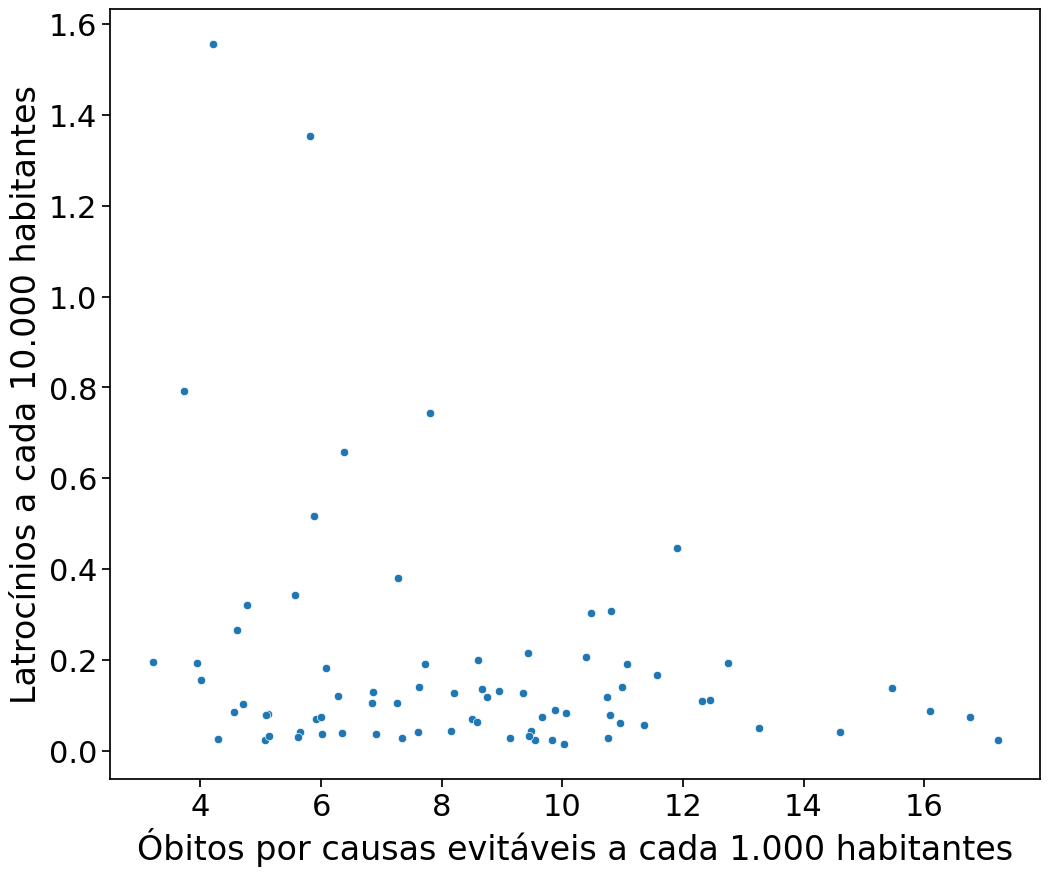

In [29]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.set_context("notebook", font_scale=1.5)
sns.scatterplot(data=df,
                x='obitos_CE/10k hab',
                y='LATROCÍNIO',
                ax=ax)
ax.set(xlabel="Óbitos por causas evitáveis a cada 1.000 habitantes",
       ylabel="Latrocínios a cada 10.000 habitantes")
fig.savefig("latrocinios_obitosCE.png", transparent=True)